# Descipción del dataset

El dataset Sloan Digital Sky Survey DR14 contiene 10.000 observaciones del espacio tomadas por el SDSS (https://www.sdss.org/). Cada observación es descrita por 17 columnas de características y una columna de clase que la identifica como una estrella, galaxia o quasar. Los datos del SDSS están descritas por características obtenidos por varias mediciones de espectros ópticos y infrarrojos.


In [31]:
#importando las librerias a ocupar
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [32]:
space = pd.read_csv("datos/SDSS-DR14.csv")
#estructura del dataset
print(space.head())

          objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  549

In [33]:
#se muestran las primeras 10 filas del dataset
space[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [34]:
#datos cuantiativos del dataset

In [35]:
space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [36]:
space.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [37]:
#distribución de los datos en el dataset

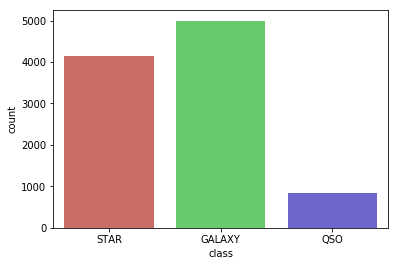

In [38]:
sb.countplot(x='class',data=space, palette='hls')

In [39]:
#Cantidad exacta de los datos para cada una de las clases

In [40]:
cl = space['class']
clase = pd.get_dummies(cl)
space = space.drop( ['class'] ,1)

In [41]:
print('GALAXY suma: ' + str(np.sum(clase['GALAXY'])))
print('QSO suma: ' + str(np.sum(clase['QSO'])))
print('STAR suma: ' + str(np.sum(clase['STAR'])))

GALAXY suma: 4998
QSO suma: 850
STAR suma: 4152


In [42]:
cl = cl.apply(lambda x: {
        'GALAXY': 1,
        'QSO': 2,
        'STAR': 3
    }[x])
cl.head()

0    3
1    3
2    1
3    3
4    3
Name: class, dtype: int64

In [43]:
space = pd.concat([space, cl],1)
space[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,3
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,3
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,1
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,3
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,3
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,0.000315,324,51666,594,3
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,0.100242,287,52023,559,1
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,0.000315,3306,54922,515,3
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,0.000089,323,51615,595,3
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,0.040508,288,52000,400,1


# Algoritmo Regresión lineal

In [44]:
Y = space["class"]
# Variables predictivas (o explicativas)
X = space[['objid','ra','dec','u','g','r','i','run','rerun','camcol','field','specobjid','redshift','plate','mjd','fiberid']]

In [45]:
est = sm.OLS(Y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     5215.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:07:07   Log-Likelihood:                -11607.
No. Observations:               10000   AIC:                         2.322e+04
Df Residuals:                    9998   BIC:                         2.323e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
objid       1.179e-18   8.06e-21    146.344      0.0

# Algoritmo de regresion logistica

In [126]:
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)


In [127]:
print(Counter(y))

Counter({0: 9900, 1: 100})


In [129]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [130]:
X_over, y_over = oversample.fit_resample(X, y)

In [131]:
print(Counter(y_over))

Counter({1: 4998, 2: 4998, 3: 4152})


In [132]:
print('GALAXY suma: ' + str(np.sum(clase['GALAXY'])))
print('QSO suma: ' + str(np.sum(clase['QSO'])))
print('STAR suma: ' + str(np.sum(clase['STAR'])))

GALAXY suma: 4998
QSO suma: 850
STAR suma: 4152


In [128]:
X = space.iloc[:,0:17].values
y = space.iloc[:, -1]

In [ ]:
print ()